In [15]:
# Plotting imshow() plots for grid mesh of 100000 models (100 log, 5 dust, 200 ages)

In [3]:
from matplotlib.pyplot import *
import numpy as np
from prospectFunctions import *
import itertools
import astropy.units as u
import astropy.constants as const
import time
from tqdm import tqdm

start = time.time()
imf_type = 2
grid_ranges, run_params = getParams(imf_type,100,5,200,dust=True)
a = 1.0 + run_params['zred']

logzs = grid_ranges['logzsol']
dusts = grid_ranges['dust2']
tages = grid_ranges['tage']

obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs, sps=sps, **run_params)

end = time.time()
print(end-start)

12.534171104431152


In [4]:
dusts

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [5]:
data_grid_params = np.load('params_sps_100000.npy')
data_grid_spec = np.load('specs_sps_100000.npy')

In [6]:
break_strengths = {}

starts = np.linspace(3620, 3850, 2, dtype=int)

for start in starts:
    
    bounds = getBreakBounds(wspec, start, **run_params)
    
    blue_lower, blue_upper = bounds['blue'][0], bounds['blue'][1]
    red_lower, red_upper = bounds['red'][0], bounds['red'][1]
    
    data_grid_break = np.empty((len(logzs),len(dusts),len(tages),1))
    
    for i_logz,i_dust,i_tage in itertools.product(range(len(logzs)),range(len(dusts)),range(len(tages))):
        lower = data_grid_spec[i_logz,i_dust,i_tage,blue_lower:blue_upper].mean()
        upper = data_grid_spec[i_logz,i_dust,i_tage,red_lower:red_upper].mean()
    
        ratio = upper/lower
    
        data_grid_break[i_logz,i_dust,i_tage,:] = ratio
    
    break_strengths[f'data_grid_break_{start}'] = data_grid_break

In [7]:
break_strengths.keys()

dict_keys(['data_grid_break_3620', 'data_grid_break_3850'])

In [19]:
rcParams['font.size'] = 25.0

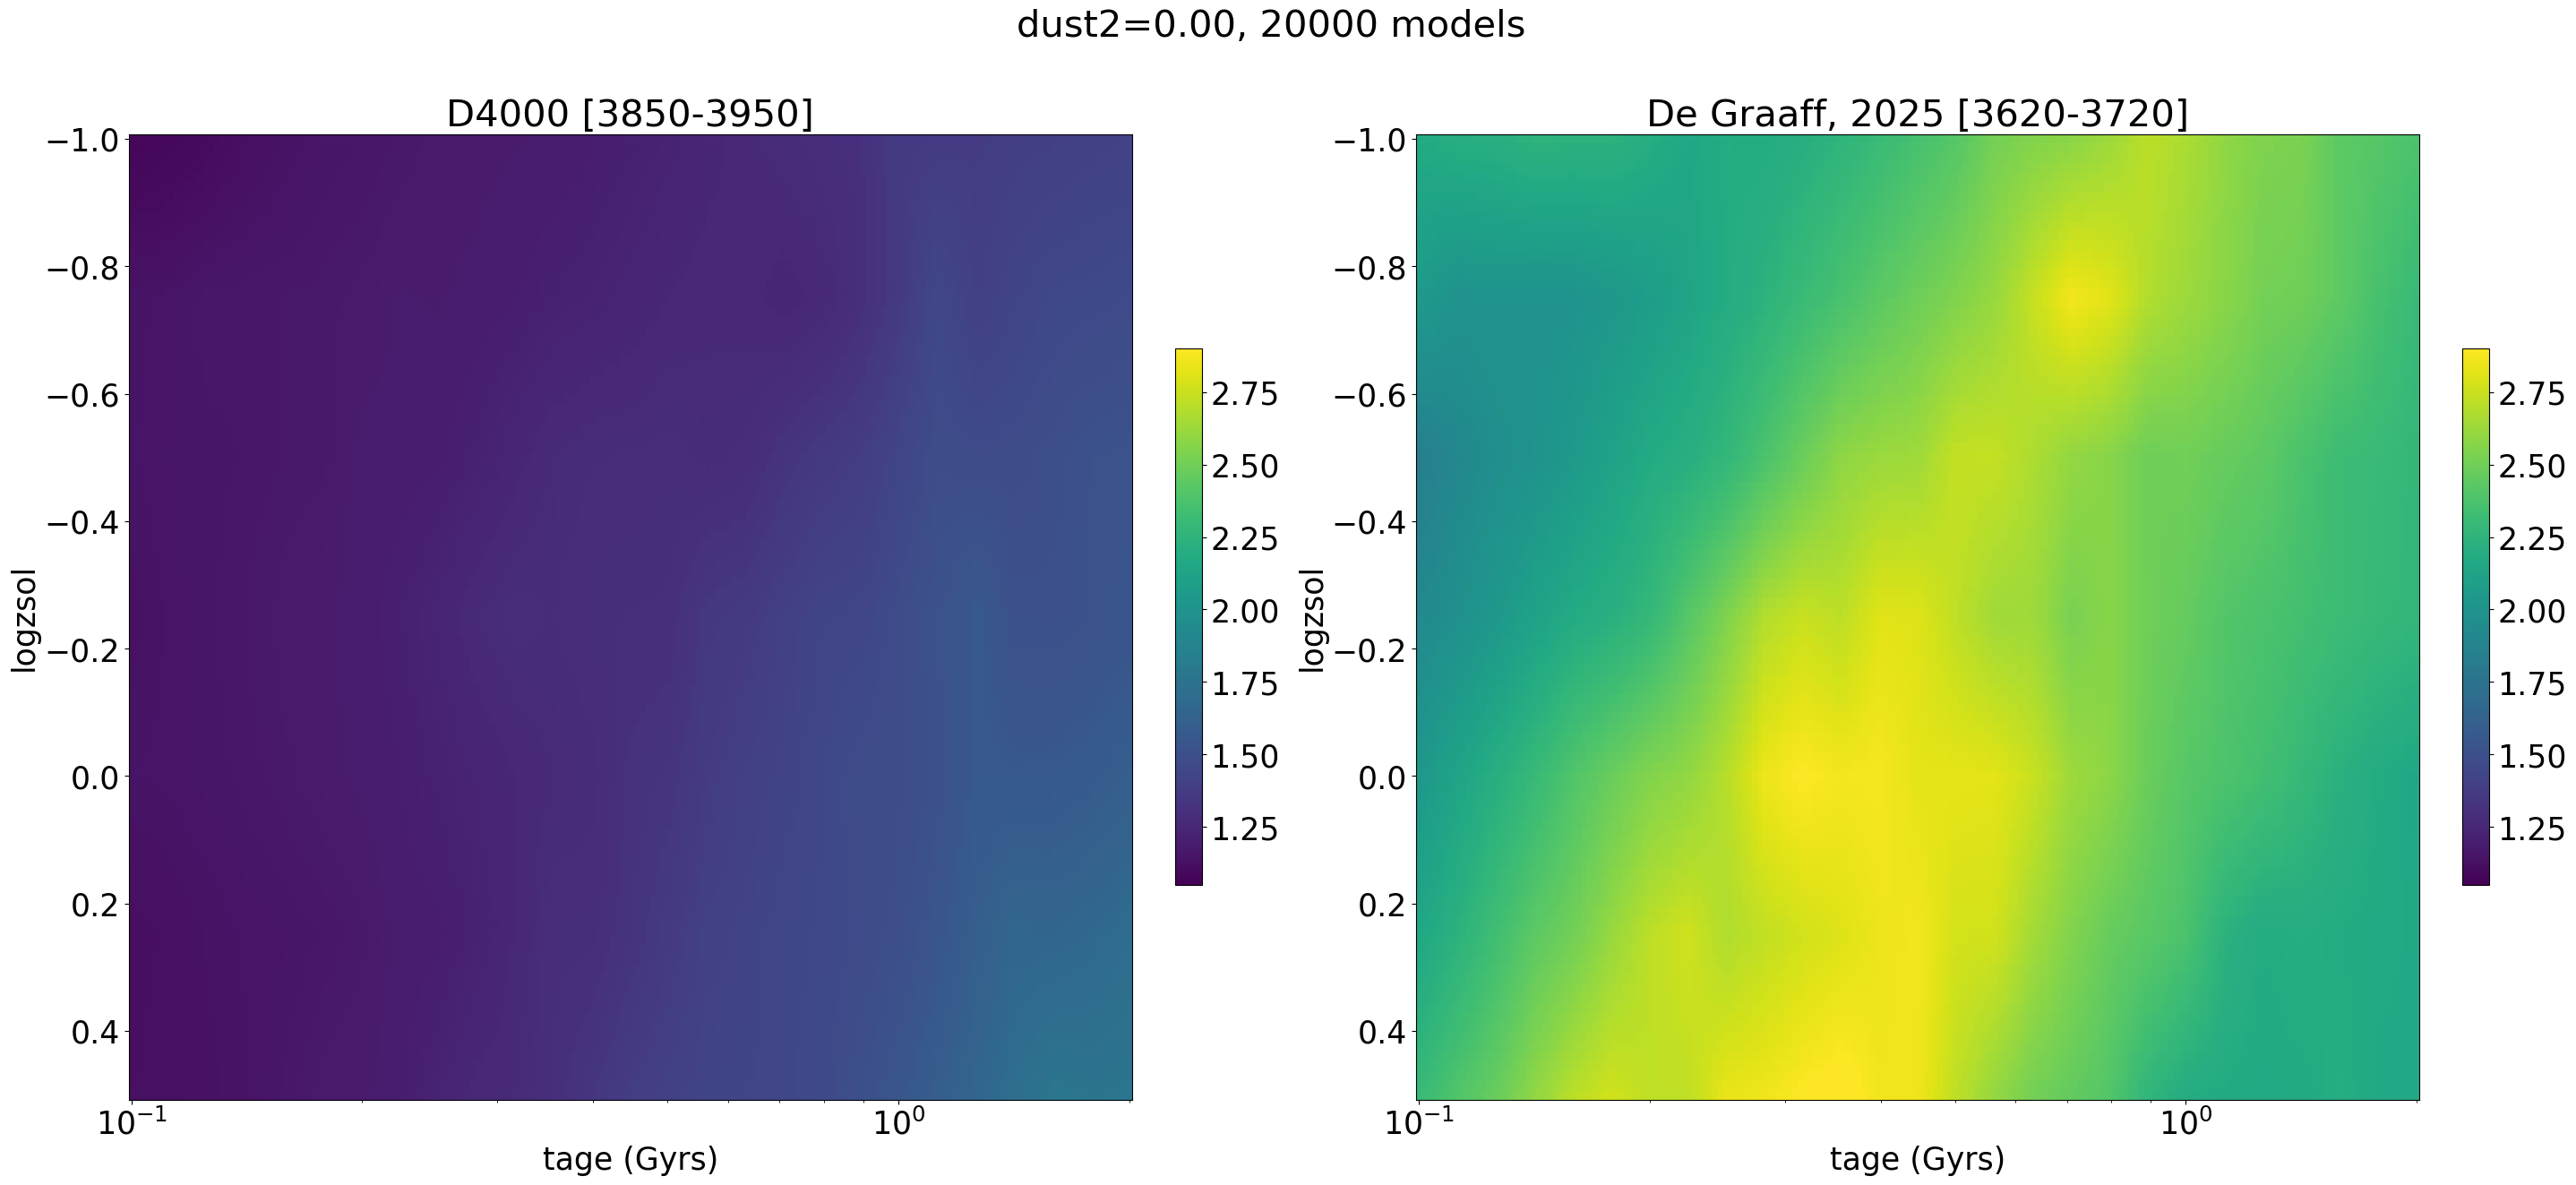

In [34]:
global_min = min(np.min(break_strengths['data_grid_break_3850'][:,0,:,0]), np.min(break_strengths['data_grid_break_3620'][:,0,:,0]))
global_max = max(np.max(break_strengths['data_grid_break_3850'][:,0,:,0]), np.max(break_strengths['data_grid_break_3620'][:,0,:,0]))

global_min, global_max = 1.05, 2.9

for i_dust in range(len(dusts[:1])):
    
    fig, [ax1, ax2] = subplots(1,2, figsize=(34,14))

    X, Y = np.meshgrid(data_grid_params[0,0,:,4],  data_grid_params[:,0,0,2])
    im1 = ax1.pcolormesh(X, Y, break_strengths['data_grid_break_3850'][:,i_dust,:,0], antialiased=False, vmin=global_min, vmax=global_max)
    ax1.set_xscale('log')
    ax1.invert_yaxis()
    fig.colorbar(im1, ax=ax1, fraction=0.025, pad=0.04)
    ax1.set_xlabel('tage (Gyrs)')
    ax1.set_ylabel('logzsol')

    X, Y = np.meshgrid(data_grid_params[0,0,:,4],  data_grid_params[:,0,0,2])
    im2 = ax2.pcolormesh(X, Y, break_strengths['data_grid_break_3620'][:,i_dust,:,0], antialiased=False, vmin=global_min, vmax=global_max)
    ax2.set_xscale('log')
    ax2.invert_yaxis()
    fig.colorbar(im2, ax=ax2, fraction=0.025, pad=0.04)
    ax2.set_xlabel('tage (Gyrs)')
    ax2.set_ylabel('logzsol')
    
    ax1.set_title('D4000 [3850-3950]')
    ax2.set_title('De Graaff, 2025 [3620-3720]')
    
    fig.suptitle(f'dust2={dusts[i_dust]:.2f}, 20000 models')

    # savefig(f'NORMALIZED_dust_{dusts[i_dust]}_age_vs_metallicity_20000.png')
    
    show()